In [1]:
import os
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent

DATA_PATH = PROJECT_ROOT / "data" / "raw" / "CDC_Diabetes_Dataset.csv"
FIG_DIR = PROJECT_ROOT / "figures" / "eda"
FIG_DIR.mkdir(parents=True, exist_ok=True)


print("Project root directory:", PROJECT_ROOT)
print("Data path exists:", DATA_PATH.exists())
assert DATA_PATH.exists(), f"Data file not found at {DATA_PATH}"
print("Figures directory:", FIG_DIR)

Project root directory: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk
Data path exists: True
Figures directory: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda


**Load data**
- the original dataset can be found at https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def savefig(name:str):
    plt.savefig(FIG_DIR / name, dpi=300, bbox_inches='tight')
    print(f"Figure saved: {FIG_DIR / name}")

In [3]:
# load data from csv
df = pd.read_csv(DATA_PATH)
print("Data loaded successfully.")
print("Top 5 rows:")
df.head()

Data loaded successfully.
Top 5 rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Check for duplicates
# ✅ CHECK FOR DUPLICATES IMMEDIATELY
print("\n" + "="*50)
print("DUPLICATE CHECK")
print("="*50)
print(f"Total rows: {len(df)}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Percentage duplicates: {(df.duplicated().sum() / len(df) * 100):.2f}%")

# Inspect a few duplicate examples (if any exist)
if df.duplicated().sum() > 0:
    print("\nExample duplicate rows:")
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))


DUPLICATE CHECK
Total rows: 253680
Duplicate rows: 23899
Percentage duplicates: 9.42%

Example duplicate rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
4517,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
207307,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
42369,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
108949,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
17475,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
80704,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
152374,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
91414,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
238843,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
48850,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0


In [5]:
# Copy original dataframe to avoid modifying it directly (df_original remains unchanged)
df_original = df.copy()

# ✅ REMOVE DUPLICATES 
print("\nRemoving duplicates...")
df = df.drop_duplicates()
print(f"Rows after deduplication: {len(df)}")
print(f"Rows removed: {len(df_original) - len(df)}")


Removing duplicates...
Rows after deduplication: 229781
Rows removed: 23899


In [6]:
# Save cleaned data for modeling
CLEAN_DATA_PATH = PROJECT_ROOT / "data" / "processed" / "CDC_Diabetes_Dataset_clean.csv"
CLEAN_DATA_PATH.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(CLEAN_DATA_PATH, index=False)
print(f"✅ Cleaned data saved to: {CLEAN_DATA_PATH}")
print(f"   Shape: {df.shape}")

✅ Cleaned data saved to: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/data/processed/CDC_Diabetes_Dataset_clean.csv
   Shape: (229781, 22)


In [7]:
# Post-deduplication summary (basic)
print("=" * 50)
print("POST-DEDUPLICATION SUMMARY")
print("=" * 50)
print(f"Final dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Duplicate check: {df.duplicated().sum()} duplicates (expected: 0)")

POST-DEDUPLICATION SUMMARY
Final dataset shape: (229781, 22)
Rows: 229,781
Columns: 22
Duplicate check: 0 duplicates (expected: 0)


**Target variable definitions for EDA**

In [8]:
# Define target
target = "Diabetes_012"

diabetes_map = {0: "No diabetes", 1: "Pre-diabetes", 2: "Diabetes"}

df["DiabetesLabel_012"] = df[target].map(diabetes_map)

# ensure logical ordering for plots
df['DiabetesLabel_012'] = pd.Categorical(
    df['DiabetesLabel_012'], 
    categories = ['No diabetes', 'Pre-diabetes', 'Diabetes'],
    ordered=True)

# Class 2 prevalence to make plots consistent without repeating
df["is_diabetes"] = (df[target] == 2).astype(int)   

In [9]:
# Target-specific summary after deduplication
print("\nTarget distribution:")
display(df[target].value_counts().reindex([0, 1, 2]))

print(f"\nClass 2 diabetes prevalence: {(df['is_diabetes'].mean() * 100):.2f}%")


Target distribution:


Diabetes_012
0    190055
1      4629
2     35097
Name: count, dtype: int64


Class 2 diabetes prevalence: 15.27%


In [10]:
# shape, dtypes, missing values

print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Data shape: (229781, 24)

Data types:
 Diabetes_012             float64
HighBP                   float64
HighChol                 float64
CholCheck                float64
BMI                      float64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
PhysActivity             float64
Fruits                   float64
Veggies                  float64
HvyAlcoholConsump        float64
AnyHealthcare            float64
NoDocbcCost              float64
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                 float64
Sex                      float64
Age                      float64
Education                float64
Income                   float64
DiabetesLabel_012       category
is_diabetes                int64
dtype: object

Missing values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker 

In [11]:
# Descriptive statistics
print("\nDescriptive statistics:")
display(df.describe(include='all').T)


Descriptive statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,NaN,NaN,NaN,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,NaN,NaN,NaN,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,NaN,NaN,NaN,0.44176,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,NaN,NaN,NaN,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,NaN,NaN,NaN,28.68567,6.78636,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,NaN,NaN,NaN,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,NaN,NaN,NaN,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,NaN,NaN,NaN,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,NaN,NaN,NaN,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,NaN,NaN,NaN,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


In [12]:
# EDA sanity checklist 
print("Rows, cols:", df.shape)

print("\n✅ Duplicates check:")
print(f"   Duplicate rows: {df.duplicated().sum()} (expected: 0)")

print("\nMissing values (total):", df.isna().sum().sum())

print("\nTarget distribution (Diabetes_012):")
display(df[target].value_counts().reindex([0,1,2]))
print("\nClass 2 prevalence (%):", round(df["is_diabetes"].mean()*100, 2))

binary_cols = ["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack",
              "PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare",
              "NoDocbcCost","DiffWalk","Sex"]
ordinal_cols = ["Age","Education","Income","GenHlth"]
numeric_cols = ["BMI","MentHlth","PhysHlth"]

print("\nBinary cols present:", all(c in df.columns for c in binary_cols))
print("Ordinal cols present:", all(c in df.columns for c in ordinal_cols))
print("Numeric cols present:", all(c in df.columns for c in numeric_cols))

Rows, cols: (229781, 24)

✅ Duplicates check:
   Duplicate rows: 0 (expected: 0)

Missing values (total): 0

Target distribution (Diabetes_012):


Diabetes_012
0    190055
1      4629
2     35097
Name: count, dtype: int64


Class 2 prevalence (%): 15.27

Binary cols present: True
Ordinal cols present: True
Numeric cols present: True


- Mapping information was taken from the CDC codebook
- Link: https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf


In [13]:
# Create age, income, education map
age_map = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80 or older"
}

income_map = {
    1: '<$10k',
    2: '$10k-$15k',
    3: '$15k-$20k',
    4: '$20k-$25k',
    5: '$25k-$35k',
    6: '$35k-$50k',
    7: '$50k-$75k',
    8: '>= $75k',
}

education_map = {
    1: 'Little to no schooling',
    2: 'Grades 1-8',
    3: 'Grades 9-11',
    4: 'Grade 12 or GED',
    5: 'College 1-3 years',
    6: 'College 4+ years'
}

genhlth_map = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}   


Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/target_distribution_diabetes_012.png


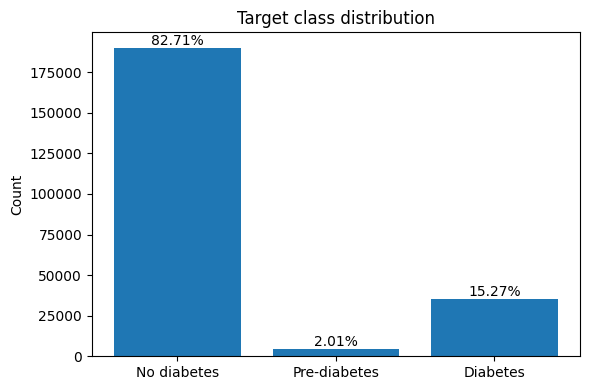

In [14]:
# plot class distribution
order = [0, 1, 2]
counts = df[target].value_counts().reindex(order)

labels = [diabetes_map[i] for i in order]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts.values)
plt.ylabel("Count")
plt.title("Target class distribution")
plt.xticks(rotation=0)

# add percentage labels above bars
total = counts.sum()
for i, v in enumerate(counts.values):
    pct = (v / total) * 100
    plt.text(i, v, f"{pct:.2f}%", ha="center", va="bottom")

plt.tight_layout()
savefig("target_distribution_diabetes_012.png")
plt.show()

In [15]:
# Global plotting helpers / labels 

# Label columns for plots 
df["AgeLabel"] = df["Age"].map(age_map)
df["IncomeLabel"] = df["Income"].map(income_map)
df["EducationLabel"] = df["Education"].map(education_map)
df["GenHealthLabel"] = df["GenHlth"].map(genhlth_map)

print("NaNs created by mapping (expected 0):")
display(df[["AgeLabel","IncomeLabel","EducationLabel","GenHealthLabel"]].isna().sum())

# Enforce correct ordering for plots (critical)
age_order = [age_map[i] for i in range(1, 14)]
income_order = [income_map[i] for i in range(1, 9)]
edu_order = [education_map[i] for i in range(1, 7)]
gen_health_order = [genhlth_map[i] for i in [1, 2, 3, 4, 5]]  # only 1–5 exist in the current dataset. 

df["AgeLabel"] = pd.Categorical(df["AgeLabel"], categories=age_order, ordered=True)
df["IncomeLabel"] = pd.Categorical(df["IncomeLabel"], categories=income_order, ordered=True)
df["EducationLabel"] = pd.Categorical(df["EducationLabel"], categories=edu_order, ordered=True)
df["GenHealthLabel"] = pd.Categorical(df["GenHealthLabel"], categories=gen_health_order, ordered=True)



NaNs created by mapping (expected 0):


AgeLabel          0
IncomeLabel       0
EducationLabel    0
GenHealthLabel    0
dtype: int64

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/numeric_features_histograms.png


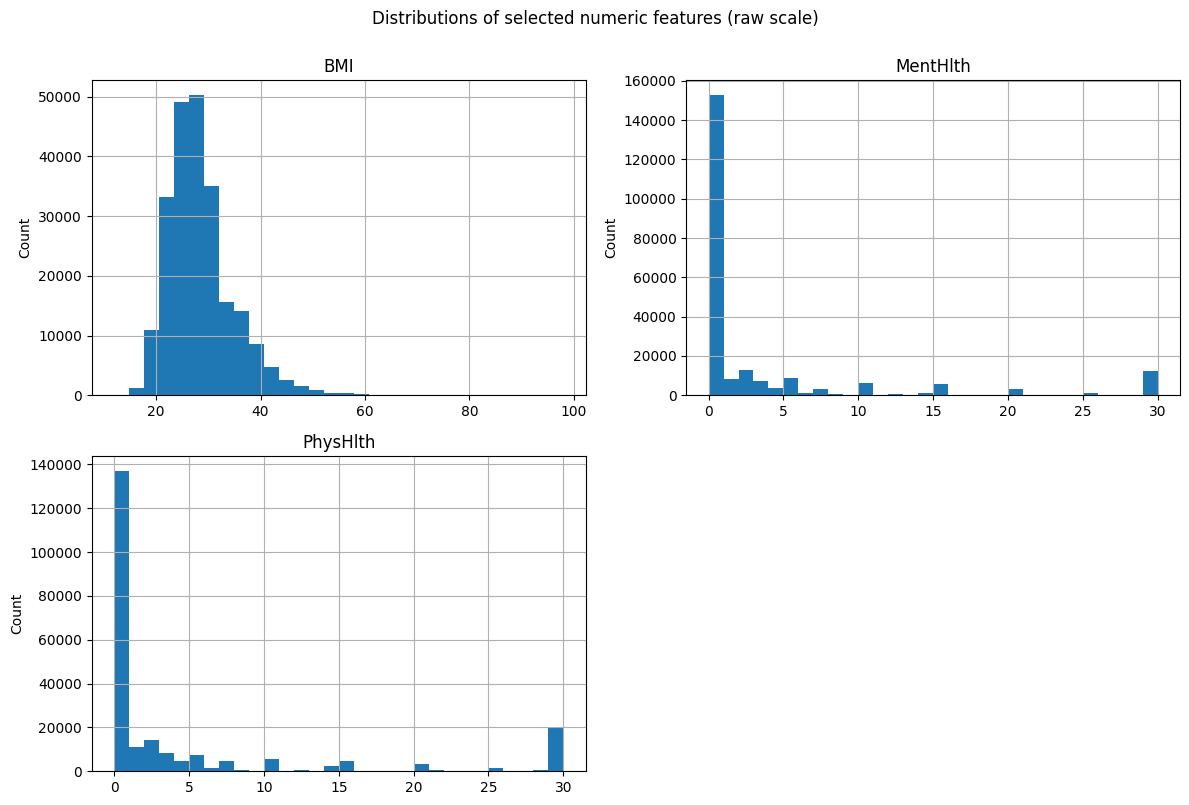

In [16]:
numeric_features = ["BMI", "MentHlth", "PhysHlth"]

df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributions of selected numeric features (raw scale)", y=1)

for ax in plt.gcf().axes:
    ax.set_ylabel("Count")
plt.tight_layout()
savefig("numeric_features_histograms.png")
plt.show()

# Age and income are ordinal coded categories, so they are analysed with category based plots rather than histograms. 

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_c2_by_age.png


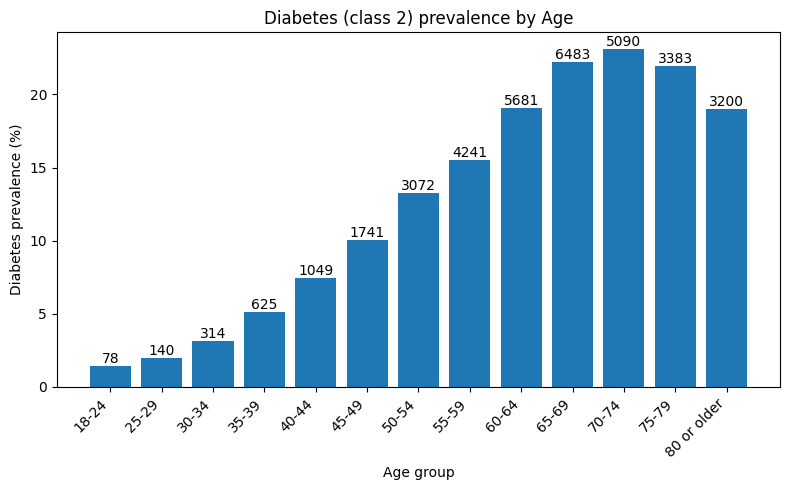

In [17]:
# bar chart of diabetes rate vs age (with absolute counts labeled)

age_rate = pd.crosstab(
    df["AgeLabel"],
    df["is_diabetes"],
    normalize="index"
) * 100
age_rate = age_rate[1]   # 1 = has diabetes (class 2)

age_counts = pd.crosstab(
    df["AgeLabel"],
    df["is_diabetes"]
)
age_counts = age_counts[1]

plt.figure(figsize=(8,5))
bars = plt.bar(age_rate.index, age_rate.values)
plt.xlabel("Age group")
plt.ylabel("Diabetes prevalence (%)")
plt.title("Diabetes (class 2) prevalence by Age")
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(age_rate.values):
    plt.text(i, v, f'{age_counts.values[i]}', ha='center', va='bottom')

plt.tight_layout()
savefig("diabetes_prevalence_c2_by_age.png")
plt.show()


Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_c2_by_income.png


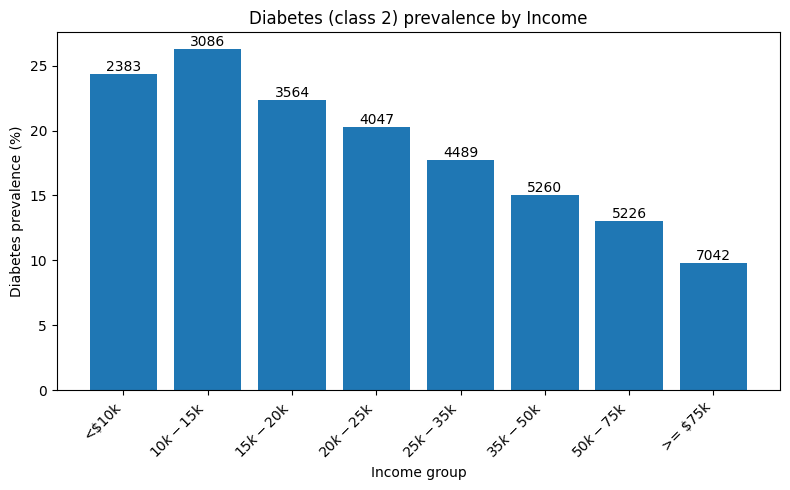

In [18]:
# Diabetes prevalence by Income 
income_rate = pd.crosstab(df["Income"], df["is_diabetes"], normalize="index") * 100
income_rate = income_rate[1].reindex(range(1, 9)) 

income_counts = pd.crosstab(df["Income"], df["is_diabetes"])
income_counts = income_counts[1].reindex(range(1, 9))

# relabel x-axis using existing map
x_labels = [income_map[i] for i in range(1, 9)]

plt.figure(figsize=(8,5))
plt.bar(x_labels, income_rate.values)
plt.xlabel("Income group")
plt.ylabel("Diabetes prevalence (%)")
plt.title("Diabetes (class 2) prevalence by Income")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(income_rate.values):
    plt.text(i, v, f'{income_counts.values[i]}', ha='center', va='bottom')

plt.tight_layout()
savefig("diabetes_prevalence_c2_by_income.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_income_healthcare_access.png


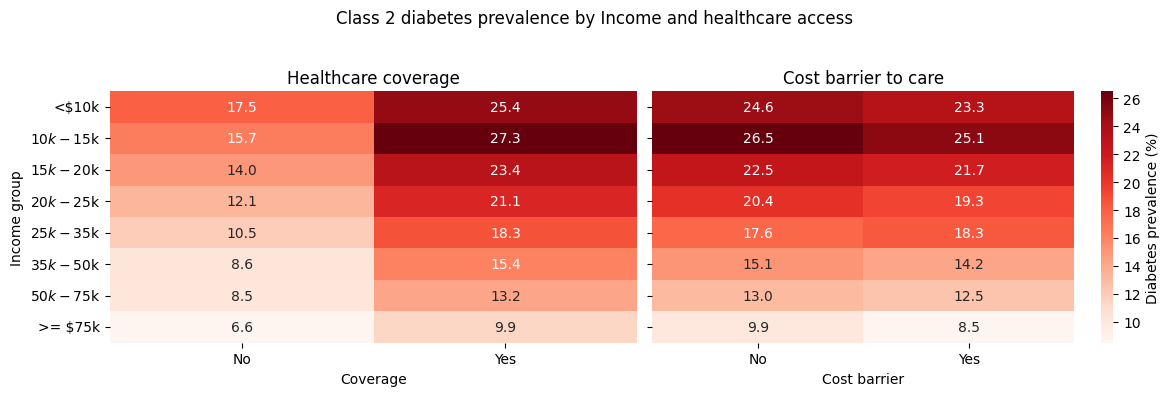

In [19]:
# Diabetes prevalence by Income and healthcare access proxies (heatmaps)
inc_order = list(range(1, 9))
inc_labels = [income_map[i] for i in inc_order]

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

fig.suptitle(
    "Class 2 diabetes prevalence by Income and healthcare access")

# AnyHealthcare: 0 = No, 1 = Yes
rate_any = pd.crosstab(
    df["Income"],
    df["AnyHealthcare"],
    values=df["is_diabetes"],
    aggfunc="mean"
) * 100
rate_any = rate_any.reindex(index=inc_order, columns=[0, 1]).round(1)

sns.heatmap(
    rate_any,
    ax=axes[0],
    cmap="Reds",
    annot=True,
    fmt=".1f",
    cbar=False
)
axes[0].set_title("Healthcare coverage")
axes[0].set_xlabel("Coverage")
axes[0].set_ylabel("Income group")
axes[0].set_yticks(np.arange(len(inc_labels)) + 0.5)
axes[0].set_yticklabels(inc_labels, rotation=0)
axes[0].set_xticks([0.5, 1.5])
axes[0].set_xticklabels(["No", "Yes"])

# NoDocbcCost: 0 = No cost barrier, 1 = Cost barrier
rate_cost = pd.crosstab(
    df["Income"],
    df["NoDocbcCost"],
    values=df["is_diabetes"],
    aggfunc="mean"
) * 100
rate_cost = rate_cost.reindex(index=inc_order, columns=[0, 1]).round(1)

sns.heatmap(
    rate_cost,
    ax=axes[1],
    cmap="Reds",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Diabetes prevalence (%)"}
)
axes[1].set_title("Cost barrier to care")
axes[1].set_xlabel("Cost barrier")
axes[1].set_ylabel("")
axes[1].set_yticks(np.arange(len(inc_labels)) + 0.5)
axes[1].set_yticklabels(inc_labels, rotation=0)
axes[1].set_xticks([0.5, 1.5])
axes[1].set_xticklabels(["No", "Yes"])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve space for suptitle
savefig("diabetes_prevalence_by_income_healthcare_access.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_education.png


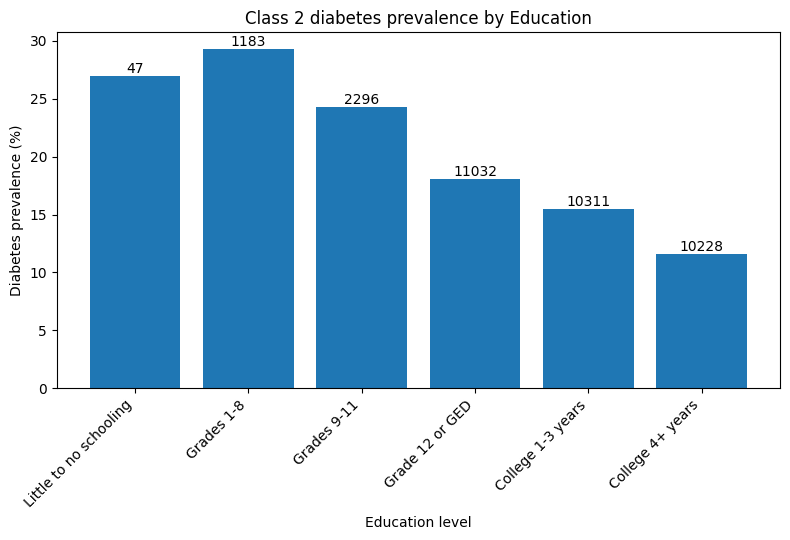

In [20]:
# Diabetes prevalence by Education (with absolute counts)

edu_order = list(range(1, 7))
edu_labels = [education_map[i] for i in edu_order]

# Prevalence (%)
edu_rate = pd.crosstab(
    df["Education"],
    df["is_diabetes"],
    normalize="index"
) * 100
edu_rate = edu_rate[1].reindex(edu_order)

# Absolute counts
edu_counts = pd.crosstab(
    df["Education"],
    df["is_diabetes"]
)
edu_counts = edu_counts[1].reindex(edu_order)

plt.figure(figsize=(8,5.5))
bars = plt.bar(edu_labels, edu_rate.values)

plt.xlabel("Education level")
plt.ylabel("Diabetes prevalence (%)")
plt.title("Class 2 diabetes prevalence by Education")
plt.xticks(rotation=45, ha="right")

# add absolute counts above bars
for i, v in enumerate(edu_rate.values):
    plt.text(i, v, f'{edu_counts.values[i]}', ha='center', va='bottom')

plt.tight_layout()
savefig("diabetes_prevalence_by_education.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_income_education_heatmap.png


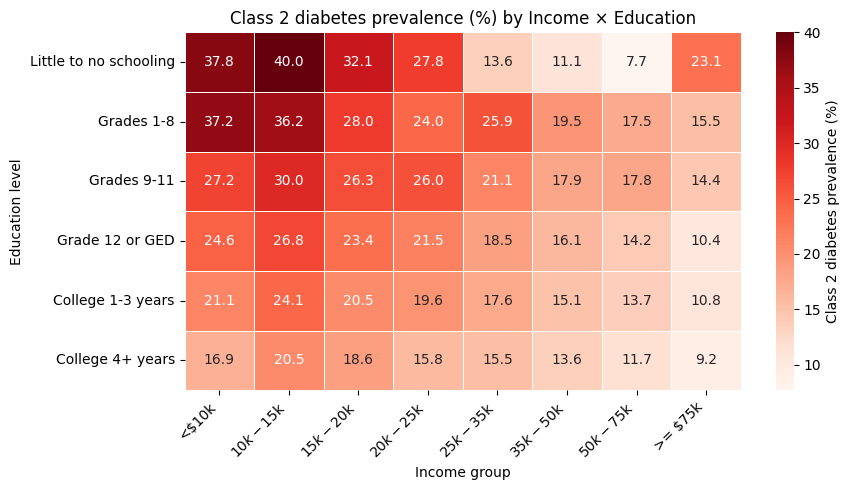

In [21]:
# Diabetes prevalence by Income and Education (heatmap)
inc_order = list(range(1, 9))
edu_order = list(range(1, 7))

inc_labels = [income_map[i] for i in inc_order]
edu_labels = [education_map[i] for i in edu_order]

rate = pd.crosstab(
    df["Education"],
    df["Income"],
    values=df["is_diabetes"],
    aggfunc="mean"
) * 100

rate = rate.reindex(index=edu_order, columns=inc_order).round(1)

plt.figure(figsize=(9, 5))
sns.heatmap(
    rate,
    cmap="Reds",
    linewidths=0.5,
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Class 2 diabetes prevalence (%)"}
)
plt.xticks(ticks=np.arange(len(inc_labels)) + 0.5, labels=inc_labels, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(edu_labels)) + 0.5, labels=edu_labels, rotation=0)
plt.xlabel("Income group")
plt.ylabel("Education level")
plt.title("Class 2 diabetes prevalence (%) by Income × Education")
plt.tight_layout()
savefig("diabetes_prevalence_by_income_education_heatmap.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_general_health.png


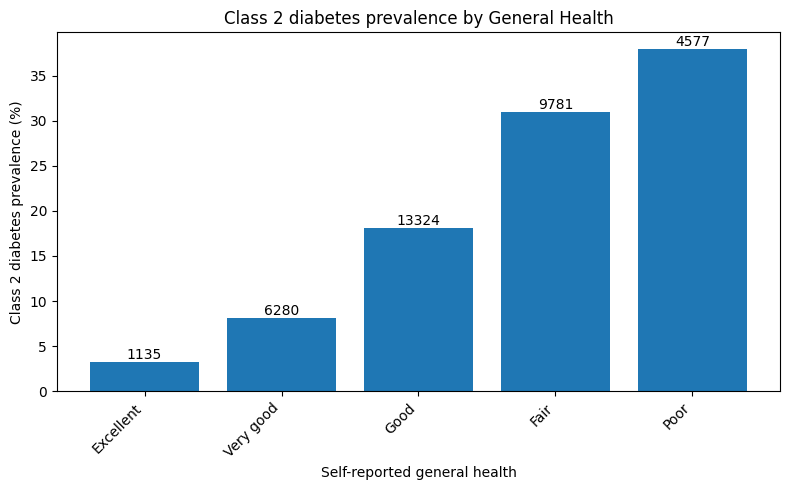

In [22]:
# Diabetes prevalence by General Health (class 2)

# prevalence (%)
gen_health_rate = pd.crosstab(
    df["GenHealthLabel"],
    df["is_diabetes"],
    normalize="index"
) * 100

gen_health_rate = gen_health_rate[1].reindex(gen_health_order)

# absolute counts
gen_health_counts = pd.crosstab(
    df["GenHealthLabel"],
    df["is_diabetes"]
)[1].reindex(gen_health_order)

plt.figure(figsize=(8, 5))
bars = plt.bar(gen_health_rate.index, gen_health_rate.values)

plt.xlabel("Self-reported general health")
plt.ylabel("Class 2 diabetes prevalence (%)")
plt.title("Class 2 diabetes prevalence by General Health")
plt.xticks(rotation=45, ha="right")

# add absolute counts above bars
for i, v in enumerate(gen_health_rate.values):
    plt.text(i,v,gen_health_counts.values[i],
        ha="center",va="bottom")

plt.tight_layout()
savefig("diabetes_prevalence_by_general_health.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_binary_features.png


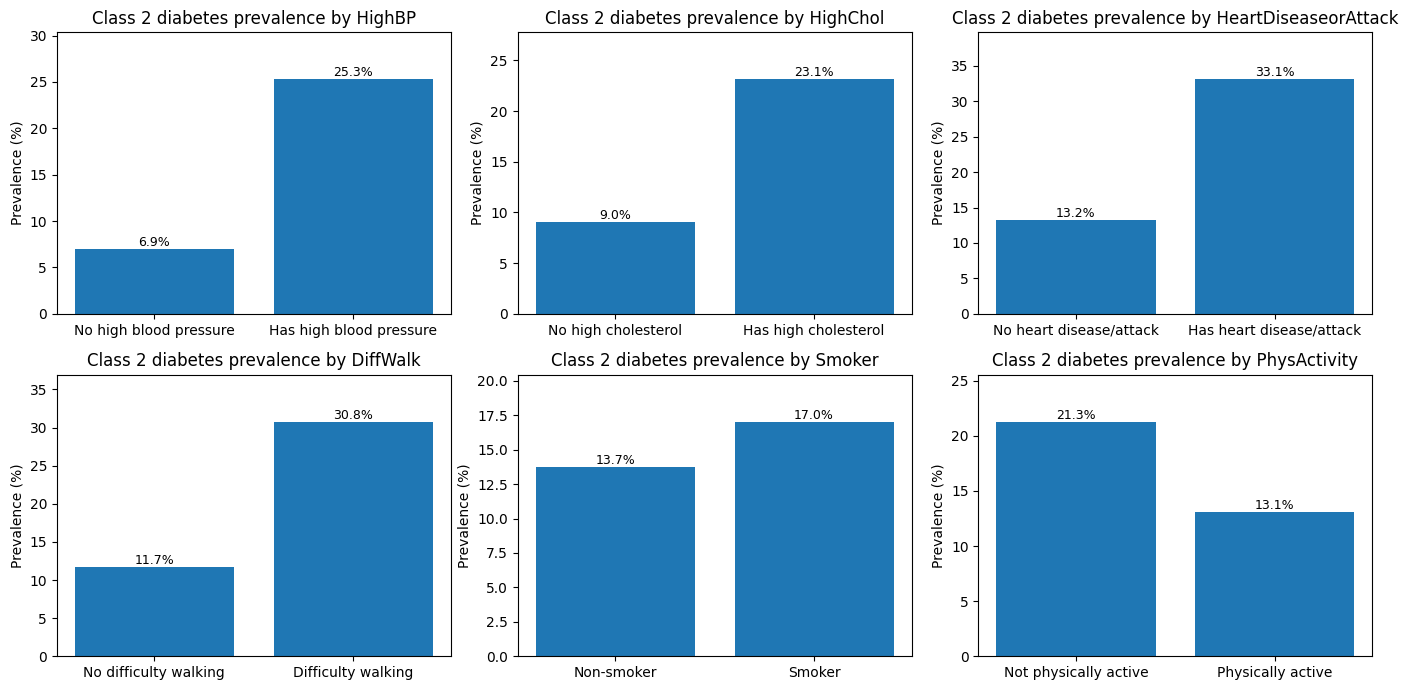

In [23]:
binary_features = {
    "HighBP": ["No high blood pressure", "Has high blood pressure"],
    "HighChol": ["No high cholesterol", "Has high cholesterol"],
    "HeartDiseaseorAttack": ["No heart disease/attack", "Has heart disease/attack"],
    "DiffWalk": ["No difficulty walking", "Difficulty walking"],
    "Smoker": ["Non-smoker", "Smoker"],
    "PhysActivity": ["Not physically active", "Physically active"]
}

fig, axes = plt.subplots(2, 3, figsize=(14, 7))
axes = axes.flatten()

for ax, (feat, labels) in zip(axes, binary_features.items()):
    rate = pd.crosstab(df[feat], df["is_diabetes"], normalize="index") * 100
    y = rate[1].reindex([0, 1])  # 1 = class 2 diabetes

    ax.bar(labels, y.values)
    ax.set_title(f"Class 2 diabetes prevalence by {feat}")
    ax.set_ylabel("Prevalence (%)")
    ax.set_ylim(0, max(y.values) * 1.2)

    # show values on bars (optional but useful)
    for i, v in enumerate(y.values):
        ax.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
savefig("diabetes_prevalence_by_binary_features.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/bmi_boxplot_by_diabetes.png


<Figure size 600x400 with 0 Axes>

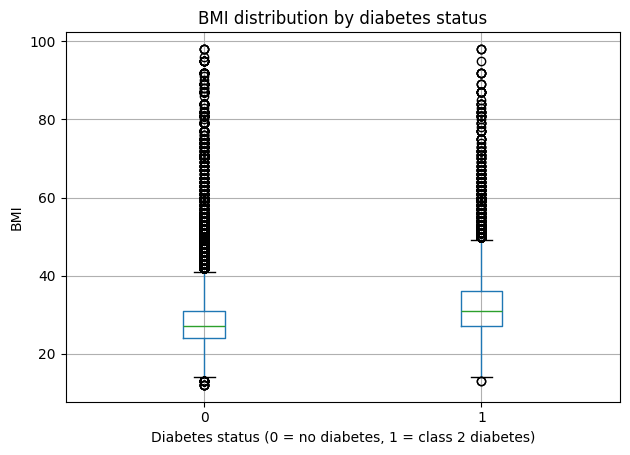

In [24]:
plt.figure(figsize=(6, 4))
df.boxplot(column="BMI", by="is_diabetes")
plt.xlabel("Diabetes status (0 = no diabetes, 1 = class 2 diabetes)")
plt.ylabel("BMI")
plt.title("BMI distribution by diabetes status")
plt.suptitle("")
plt.tight_layout()
savefig("bmi_boxplot_by_diabetes.png")
plt.show()

# Note: is_diabetes groups class 0 (no diabetes) and class 1 (pre-diabetes) together as 0
# vs class 2 (diabetes) as 1. Median BMI is slightly higher for the diabetes group.
# Both groups show high BMI values with extreme outliers in the right tail.

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/numeric_features_vs_diabetes_boxplots.png


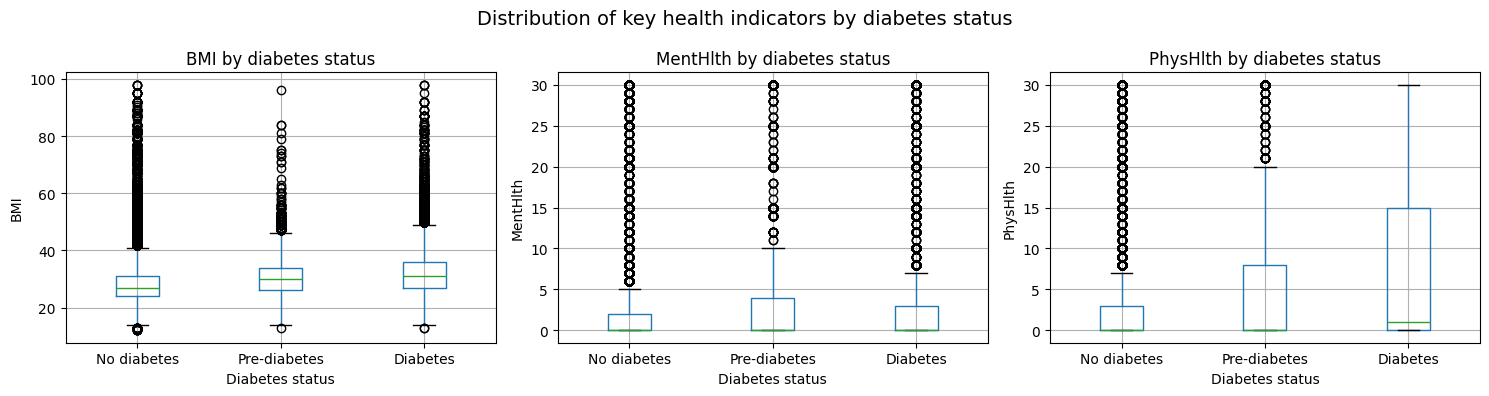

In [25]:
cols = ["BMI", "MentHlth", "PhysHlth"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, cols):
    df.boxplot(column=col, by=target, ax=ax)

    ax.set_title(f"{col} by diabetes status")
    ax.set_xlabel("Diabetes status")
    ax.set_ylabel(col)

    # pandas boxplot groups are placed at positions 1..k in sorted group order (0,1,2)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["No diabetes", "Pre-diabetes", "Diabetes"], rotation=0)

# Replace the default pandas "col" suptitle with your own
fig.suptitle("Distribution of key health indicators by diabetes status", fontsize=14)

plt.tight_layout()
savefig("numeric_features_vs_diabetes_boxplots.png")
plt.show()

Key Insights from initial EDA
- Dataset has 228,680 rows, 22 variables, no missing values (after removing 25,000 duplicates from original 253,680 rows)
- Target imbalance: approx 85.69% no diabetes, 3.86% pre-diabetes, 10.45% diabetes
- Class 2 diabetes prevalence: 10.45%
- Diabetes prevalence strongly increases with age
- Lower income bands show higher diabetes prevalence
- Lower education is associated with higher diabetes prevalence
- General health shows a clear pattern: worse self-reported health shows higher diabetes prevalence

- Binary health indicators such as high blood pressure, high cholesterol, heart disease, and difficulty walking show strong separation in diabetes prevalence. Individuals reporting these conditions exhibit substantially higher diabetes prevalence compared to those without the condition. Physical activity shows a protective association, with lower diabetes prevalence among physically active respondents.

- Figure X illustrates the prevalence of class 2 diabetes across key binary health and lifestyle indicators. Clear and consistent separation is observed across several clinically and functionally relevant variables.

Individuals reporting high blood pressure exhibit substantially higher diabetes prevalence (24.4%) compared to those without high blood pressure (6.0%). A similar pattern is observed for high cholesterol, where diabetes prevalence increases from 8.0% among individuals without high cholesterol to 22.0% among those with the condition.

The strongest separation is observed for heart disease or prior heart attack, with diabetes prevalence rising from 12.0% in individuals without cardiovascular disease to 33.0% in those reporting a history of heart disease or heart attack. Difficulty walking also shows a pronounced association, with diabetes prevalence increasing from 10.5% to 30.7%, indicating a strong relationship between functional health limitations and diabetes prevalence.

Lifestyle factors show more moderate but still meaningful patterns. Smokers exhibit higher diabetes prevalence (16.3%) compared to non-smokers (12.1%). In contrast, physical activity demonstrates a protective association: physically active individuals show substantially lower diabetes prevalence (11.6%) compared to those who are not physically active (21.1%)

Overall, these findings suggest that cardiovascular conditions, functional limitations, and lifestyle behaviours are strongly associated with diabetes prevalence. These variables are therefore likely to be informative predictors in downstream modelling and motivate their inclusion without further aggregation or transformation during feature engineering.


In [26]:
df["BMI"].describe()

count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64

In [27]:
df.loc[df["BMI"] >= 60, ["BMI", target]].head(20)
df["BMI"].quantile([0.95, 0.99, 0.995, 0.999])

0.950    40.00
0.990    50.00
0.995    56.00
0.999    81.22
Name: BMI, dtype: float64

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/bmi_distribution_by_diabetes_status.png


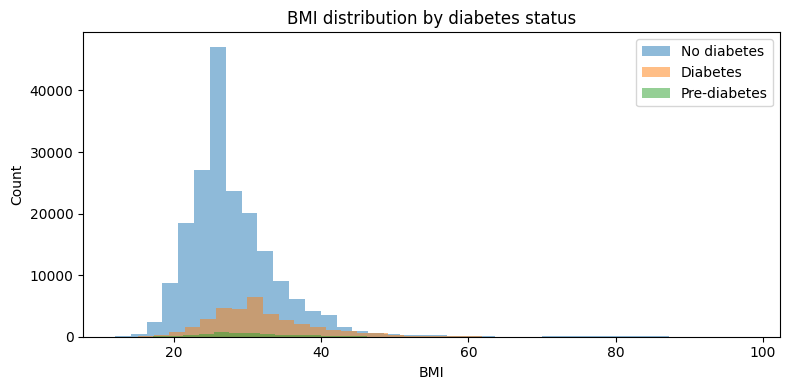

In [28]:
plt.figure(figsize=(8,4))
plt.hist(df.loc[df[target]==0, "BMI"], bins=40, alpha=0.5, label="No diabetes")
plt.hist(df.loc[df[target]==2, "BMI"], bins=40, alpha=0.5, label="Diabetes")
plt.hist(df.loc[df[target]==1, "BMI"], bins=40, alpha=0.5, label="Pre-diabetes")

#plt.xlim(10, 60)  # focus on meaningful range; tail is tiny
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI distribution by diabetes status")
plt.legend()
plt.tight_layout()
savefig("bmi_distribution_by_diabetes_status.png")
plt.show()

In [29]:
df.dtypes

Diabetes_012             float64
HighBP                   float64
HighChol                 float64
CholCheck                float64
BMI                      float64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
PhysActivity             float64
Fruits                   float64
Veggies                  float64
HvyAlcoholConsump        float64
AnyHealthcare            float64
NoDocbcCost              float64
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                 float64
Sex                      float64
Age                      float64
Education                float64
Income                   float64
DiabetesLabel_012       category
is_diabetes                int64
AgeLabel                category
IncomeLabel             category
EducationLabel          category
GenHealthLabel          category
dtype: object

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/correlation_heatmap_numeric_ordinal_features.png


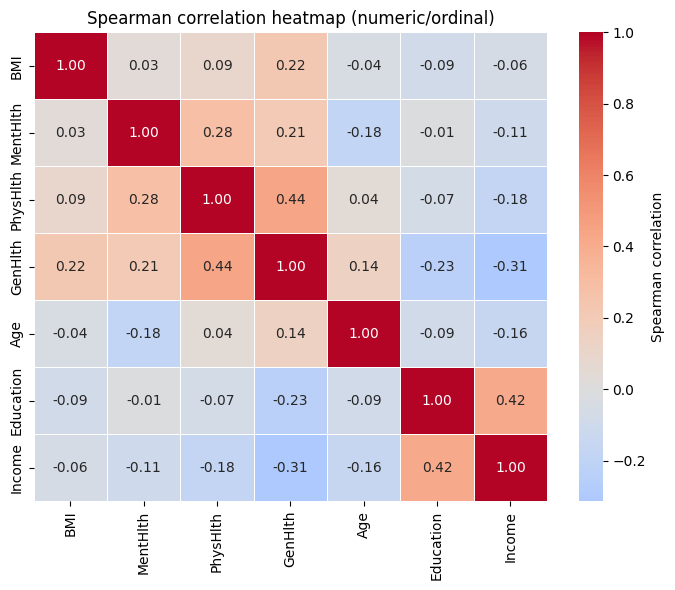

In [30]:
# Correlation heatmap for numeric/ordinal features
corr_features = [
    "BMI",
    "MentHlth",
    "PhysHlth",
    "GenHlth",
    "Age",
    "Education",
    "Income"
]

corr = df[corr_features].corr(method="spearman")  # Spearman is better for ordinal data

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Spearman correlation"}
)
plt.title("Spearman correlation heatmap (numeric/ordinal)")
plt.tight_layout()
savefig("correlation_heatmap_numeric_ordinal_features.png")
plt.show()



Figure X presents a Spearman correlation heatmap for selected numeric and ordinal variables. Spearman’s rank correlation was used due to the ordinal nature of several features (age group, education, income, and general health). Moderate correlations are observed between socio-economic indicators (education and income) and between health burden measures (general and physical health), reflecting expected structural relationships within the population. Importantly, no strong correlations (|ρ| > 0.8) are observed, indicating the absence of severe multicollinearity. This suggests that the selected features provide complementary information and can be retained for downstream modelling without requiring dimensionality reduction at this stage.


Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_age_sex_lines.png


/var/folders/r_/89p6ltl118s2v03wfvz87p040000gn/T/ipykernel_52410/1879723207.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["AgeLabel", "Sex"])
/var/folders/r_/89p6ltl118s2v03wfvz87p040000gn/T/ipykernel_52410/1879723207.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["AgeLabel", "Sex"])


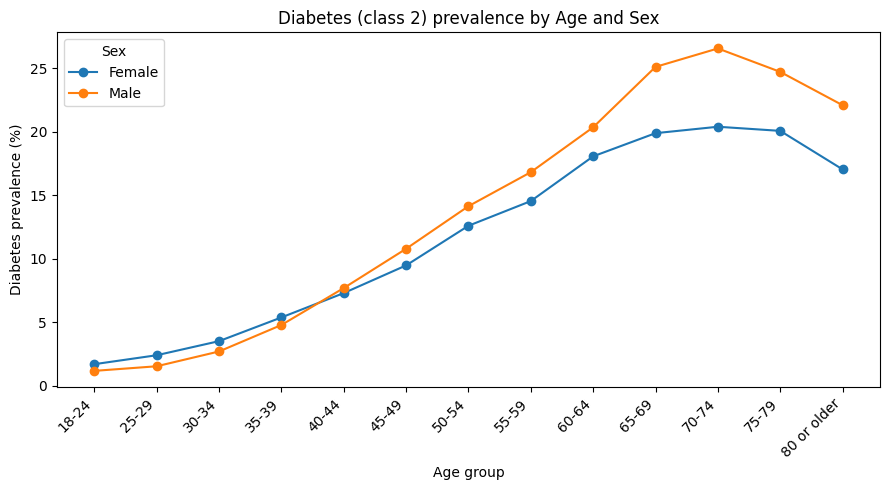

In [31]:
# Diabetes prevalence by Age and Sex (within-sex prevalence)
age_order = [age_map[i] for i in range(1, 14)]

# Denominators: total people in each age group by sex
denom = (
    df.groupby(["AgeLabel", "Sex"])
      .size()
      .unstack(fill_value=0)
      .reindex(age_order)
)

# Numerators: diabetes cases (class 2) in each age group by sex
num = (
    df[df["is_diabetes"] == 1]
      .groupby(["AgeLabel", "Sex"])
      .size()
      .unstack(fill_value=0)
      .reindex(age_order)
)

# Prevalence within sex
female_rate = (num[0] / denom[0] * 100).fillna(0)
male_rate   = (num[1] / denom[1] * 100).fillna(0)

plt.figure(figsize=(9, 5))
plt.plot(age_order, female_rate.values, marker="o", label="Female")
plt.plot(age_order, male_rate.values, marker="o", label="Male")

plt.xlabel("Age group")
plt.ylabel("Diabetes prevalence (%)")
plt.title("Diabetes (class 2) prevalence by Age and Sex")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sex")
plt.tight_layout()
savefig("diabetes_prevalence_by_age_sex_lines.png")
plt.show()

Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/bmi_distribution_by_age_group.png


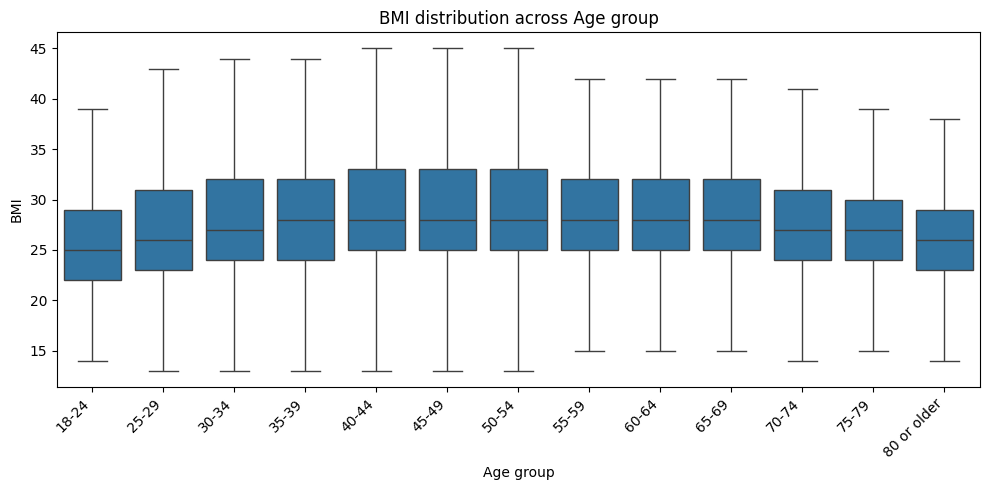

In [32]:
# BMI distribution by Age group
plt.figure(figsize=(10, 5))
order = list(age_map.values())
sns.boxplot(data=df, x='AgeLabel', y='BMI', order=order, showfliers=False)
plt.xlabel('Age group')
plt.ylabel('BMI')
plt.title('BMI distribution across Age group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
savefig('bmi_distribution_by_age_group.png')
plt.show()


Figure X shows the distribution of BMI across age groups. Median BMI increases steadily with age, and the spread of BMI values widens in older age groups. This suggests that both BMI level and variability are age-dependent, which may partially explain the observed increase in diabetes prevalence with age. These patterns indicate potential interaction effects between age and BMI, motivating the use of flexible modelling approaches capable of capturing non-linear relationships.


Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_age_sex_heatmap.png


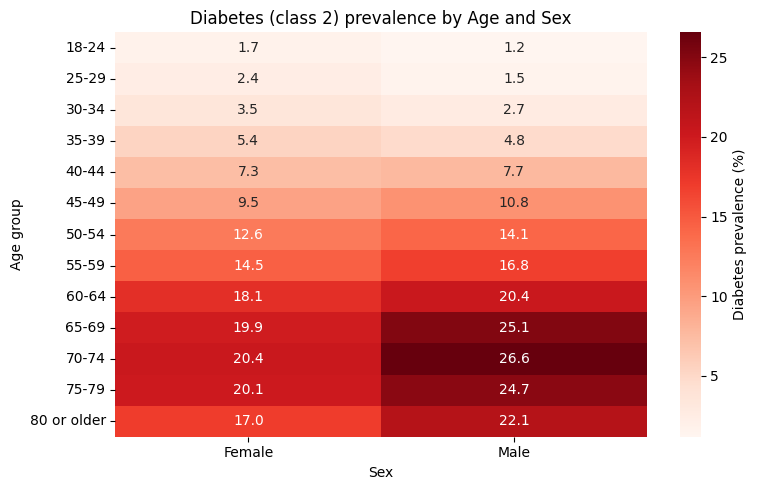

In [33]:
# Diabetes prevalence by Age and Sex (heatmap)
age_order = list(age_map.values())

rate = pd.crosstab(
    df["AgeLabel"],
    df["Sex"],
    values=df["is_diabetes"],
    aggfunc="mean"
) * 100

rate = rate.reindex(age_order)
rate = rate.rename(columns={0: "Female", 1: "Male"})

plt.figure(figsize=(8, 5))
sns.heatmap(rate, cmap="Reds", annot=True, fmt=".1f",
            cbar_kws={"label": "Diabetes prevalence (%)"})
plt.xlabel("Sex")
plt.ylabel("Age group")
plt.title("Diabetes (class 2) prevalence by Age and Sex")
plt.tight_layout()
savefig("diabetes_prevalence_by_age_sex_heatmap.png")
plt.show()


Figure saved: /Users/dawoodbutt/Desktop/10. UNI/4. Data Mining/individual assessment/diabetes-risk/figures/eda/diabetes_prevalence_by_genhlth_age_heatmap.png


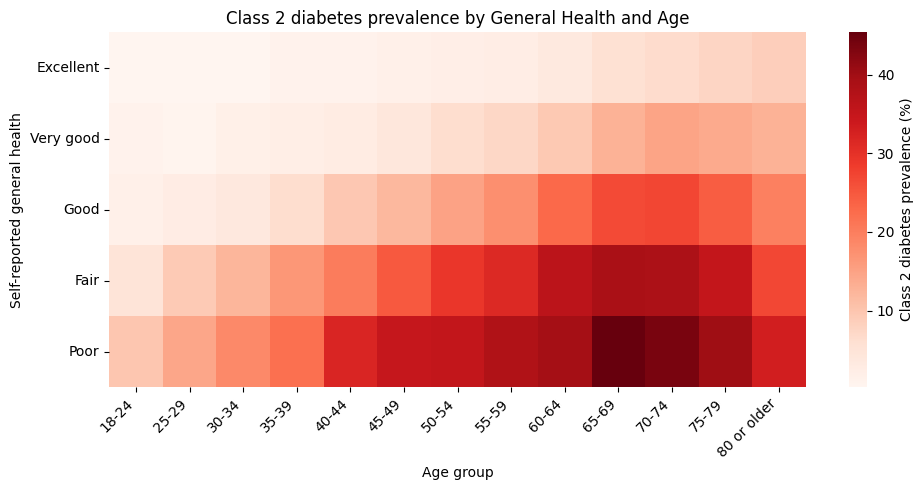

In [34]:
# Diabetes prevalence by General Health and Age (heatmap)

age_order = [age_map[i] for i in range(1, 14)]
gen_order = [genhlth_map[i] for i in [1, 2, 3, 4, 5]]  # explicit ordering

rate = pd.crosstab(
    df["GenHealthLabel"],
    df["AgeLabel"],
    values=df["is_diabetes"],
    aggfunc="mean"
) * 100

rate = rate.reindex(index=gen_order, columns=age_order)

plt.figure(figsize=(10, 5))
sns.heatmap(
    rate,
    cmap="Reds",
    annot=False,
    cbar_kws={"label": "Class 2 diabetes prevalence (%)"}
)

plt.xlabel("Age group")
plt.ylabel("Self-reported general health")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.title("Class 2 diabetes prevalence by General Health and Age")
plt.tight_layout()
savefig("diabetes_prevalence_by_genhlth_age_heatmap.png")
plt.show()
